# Stock Price Prediction Using Linear Regression

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Loading Data

In [3]:
data = pd.read_csv("TSLA.csv")

### Let's See The Data

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [21]:
data.isnull().sum().sum()

0

### Separate the Input and Output Columns

In [25]:
X = data [['High','Low','Open','Volume']]
y = data['Close']

In [10]:
X.shape

(2579, 4)

In [11]:
y.shape

(2579,)

### Spliting the Train and Test data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2) # 1, 2, 3, 4,5, 6,7,8,9,10 #shuffle, strafity
X_train.shape #train 

(1805, 4)

### Linear Regression Model

In [74]:
reg = LinearRegression()

### Fitting the data in the Model

In [76]:
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
print(reg.coef_)

[ 9.00473609e-01  6.71353564e-01 -5.75912766e-01 -6.30760373e-09]


In [80]:
print(reg.intercept_)

0.18475244324366003


### Prediction

In [82]:
predicted = reg.predict(X_test)

In [ ]:
print(predicted)

[ 41.40017442   7.21187206 144.2669485   61.84820973  98.06330725
   5.65252247  46.16093523   5.54269819   5.41016266  64.19506098
  72.26558699  41.09036215  43.038594     6.95740005  39.67243013
 302.89200101 409.08230948  68.60831879  50.952103    65.6007322
  38.68641762  28.10044447 101.36337851  45.83699735  24.27461967
  71.0747327    6.70635407   5.42628639   5.80509497   5.59402121
   4.19213293   4.33494644   7.16278096  40.46722446  65.96399856
   4.38070417  67.5134092    6.5062984   51.74262896  71.63502047
   4.291472     7.04851848  41.98387624  69.79186377  52.49169072
   8.86689107   6.83915693   7.08443696  38.98874029   4.14313509
  70.05125412   5.12666755   4.31650601  66.46385824  49.3168433
  41.77517857   5.34955406   6.57786136  48.10563481  47.44517865
  70.14469611 130.98327791  49.32517131   5.87248603  59.55618982
   6.96552275   6.46641654  52.84061353  43.13347493  50.18612244
  52.8175054   61.86531057   6.43703334  43.92342603  61.43302142
  44.7133811

### Combine the Actual and Predicted data

In [39]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted' : predicted.flatten()})

In [41]:
data1.head(20)

,Actual,Predicted
1475,41.737999,41.400174
515,7.192000,7.211872
2433,148.723999,144.266949
1718,61.726002,61.848210
2455,96.311996,98.063307
263,5.516000,5.652522
2332,46.285999,46.160935
221,5.320000,5.542698
312,5.276000,5.410163
1847,64.015999,64.195061


### Mean Absolute Error

In [44]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.5487478031381532
Mean Squared Error: 2.4292379298830835
Root Mean Squared Error: 1.5586012735408257


### Plotting Graph 

In [47]:
graph = data1.head(20)

<Axes: >

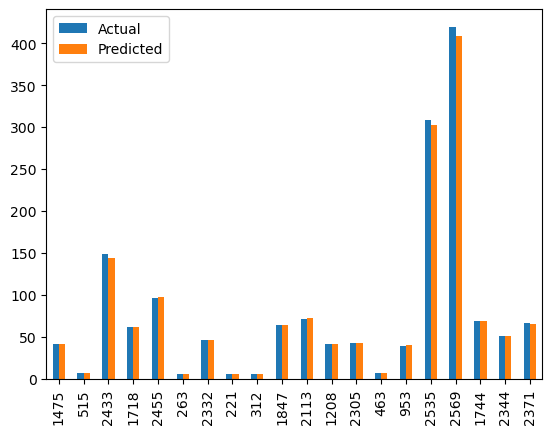

In [49]:
graph.plot(kind='bar')

In [90]:
# New data point for prediction
new_data = np.array([[830, 810, 820, 1600]])

# Predicting the close price
predicted_price = reg.predict(new_data)
print(f"Predicted Close Price: {predicted_price[0]}")


Predicted Close Price: 819.1257566015325
